In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing the packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/AV - Janatahack ; Healthcare Analytics II/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/AV - Janatahack ; Healthcare Analytics II/test.csv')
submission = pd.read_csv('/content/gdrive/My Drive/AV - Janatahack ; Healthcare Analytics II/sample_submission.csv')
train_dict = pd.read_csv('/content/gdrive/My Drive/AV - Janatahack ; Healthcare Analytics II/train_data_dict.csv')

In [ ]:
train.head(15)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [ ]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [ ]:
train['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [ ]:
test['Age'].unique()

array(['71-80', '31-40', '51-60', '41-50', '11-20', '61-70', '21-30',
       '81-90', '0-10', '91-100'], dtype=object)

In [ ]:
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [ ]:
train.groupby('Stay').size()

Stay
0-10                  23604
11-20                 78139
21-30                 87491
31-40                 55159
41-50                 11743
51-60                 35018
61-70                  2744
71-80                 10254
81-90                  4838
91-100                 2765
More than 100 Days     6683
dtype: int64

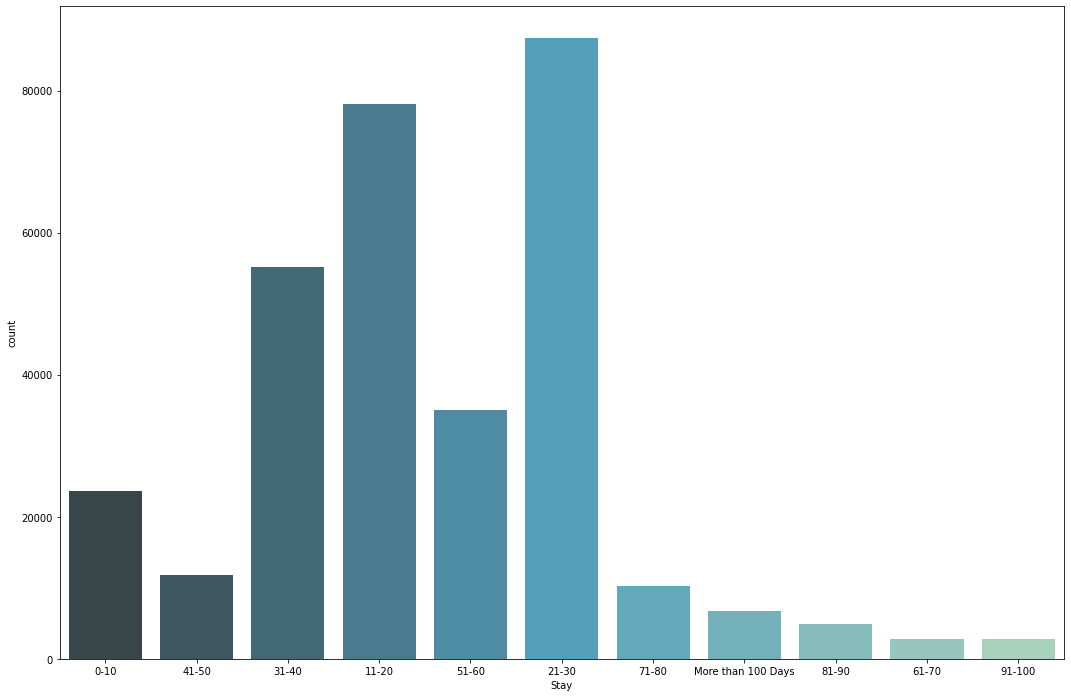

In [ ]:
plt.figure(figsize = (18,12))
sns.countplot(x = 'Stay', palette = 'GnBu_d', data = train);

In [ ]:
test.nunique()

case_id                              137057
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        15
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             39607
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    27
Age                                      10
Admission_Deposit                      6609
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [ ]:
100 * train.isnull().sum() / len(train)

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [ ]:
100 * test.isnull().sum() / len(test)

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.025537
patientid                            0.000000
City_Code_Patient                    1.573798
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
dtype: float64

In [ ]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [ ]:
test.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
25%,352703.000000,11.000000,2.000000,2.000000,2.000000,32945.000000,4.000000,2.000000,4178.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
75%,421231.000000,26.000000,7.000000,4.000000,3.000000,98851.000000,8.000000,4.000000,5398.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


In [ ]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
train_X = train.drop(['Stay', 'patientid', 'case_id'],axis=1)
y = train[['Stay']].values
test_X = test.drop(['patientid', 'case_id'],axis=1)

In [ ]:
objList = train_X.select_dtypes(include = "object").columns
print (objList)

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age'],
      dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    train_X[feat] = le.fit_transform(train_X[feat].astype(str))

print (train_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int64  
 6   Ward_Type                          318438 non-null  int64  
 7   Ward_Facility_Code                 318438 non-null  int64  
 8   Bed Grade                          318325 non-null  float64
 9   City_Code_Patient                  313906 non-null  float64
 10  Type of Admission                  318438 non-null  int64  
 11  Severity of Illness                3184

In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    test_X[feat] = le.fit_transform(test_X[feat].astype(str))

print (test_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      137057 non-null  int64  
 1   Hospital_type_code                 137057 non-null  int64  
 2   City_Code_Hospital                 137057 non-null  int64  
 3   Hospital_region_code               137057 non-null  int64  
 4   Available Extra Rooms in Hospital  137057 non-null  int64  
 5   Department                         137057 non-null  int64  
 6   Ward_Type                          137057 non-null  int64  
 7   Ward_Facility_Code                 137057 non-null  int64  
 8   Bed Grade                          137022 non-null  float64
 9   City_Code_Patient                  134900 non-null  float64
 10  Type of Admission                  137057 non-null  int64  
 11  Severity of Illness                1370

# KNN imputation

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, weights='distance') #weights='distance', metric='nan_euclidean'
X = imputer.fit_transform(train_X)

In [ ]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,8.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,7.0,0.0,0.0,2.0,5.0,4911.0
1,2.0,2.0,5.0,2.0,2.0,3.0,3.0,5.0,2.0,7.0,1.0,0.0,2.0,5.0,5954.0
2,10.0,4.0,1.0,0.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,0.0,2.0,5.0,4745.0
3,26.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,2.0,7.0,1.0,0.0,2.0,5.0,7272.0
4,26.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,7.0,1.0,0.0,2.0,5.0,5558.0


In [ ]:
names = ['Hospital_code',	'Hospital_type_code',	'City_Code_Hospital',
         'Hospital_region_code',	'Available Extra Rooms in Hospital',	'Department',
         'Ward_Type',	'Ward_Facility_Code',	'Bed Grade', 'City_Code_Patient',
         'Type of Admission',	'Severity of Illness',	'Visitors with Patient',	'Age',	'Admission_Deposit']

In [ ]:
X.columns = names
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,7.0,0.0,0.0,2.0,5.0,4911.0
1,2.0,2.0,5.0,2.0,2.0,3.0,3.0,5.0,2.0,7.0,1.0,0.0,2.0,5.0,5954.0
2,10.0,4.0,1.0,0.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,0.0,2.0,5.0,4745.0
3,26.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,2.0,7.0,1.0,0.0,2.0,5.0,7272.0
4,26.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,7.0,1.0,0.0,2.0,5.0,5558.0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, weights='distance')  #weights='uniform', metric='nan_euclidean'
test = imputer.fit_transform(test_X)

In [ ]:
test = pd.DataFrame(test)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,21.0,2.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2.0,0.0,2.0,2.0,7.0,3095.0
1,29.0,0.0,4.0,0.0,2.0,2.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4018.0
2,26.0,1.0,2.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,0.0,2.0,3.0,7.0,4492.0
3,6.0,0.0,6.0,0.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,7.0,4173.0
4,28.0,1.0,11.0,0.0,2.0,2.0,2.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4161.0


In [ ]:
names = ['Hospital_code',	'Hospital_type_code',	'City_Code_Hospital',
         'Hospital_region_code',	'Available Extra Rooms in Hospital',	'Department',
         'Ward_Type',	'Ward_Facility_Code',	'Bed Grade', 'City_Code_Patient',
         'Type of Admission',	'Severity of Illness',	'Visitors with Patient',	'Age',	'Admission_Deposit']

In [ ]:
test.columns = names
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21.0,2.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2.0,0.0,2.0,2.0,7.0,3095.0
1,29.0,0.0,4.0,0.0,2.0,2.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4018.0
2,26.0,1.0,2.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,0.0,2.0,3.0,7.0,4492.0
3,6.0,0.0,6.0,0.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,7.0,4173.0
4,28.0,1.0,11.0,0.0,2.0,2.0,2.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4161.0


In [ ]:
train.loc[(train.Stay == '11-20'),'Stay']='11-20'
# train.loc[(train.Stay == 'More than 100 Days'),'Stay']='100-400'

In [ ]:
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,2.0,7.0,0.0,0.0,2.0,5.0,4911.0
1,2.0,2.0,5.0,2.0,2.0,3.0,3.0,5.0,2.0,7.0,1.0,0.0,2.0,5.0,5954.0
2,10.0,4.0,1.0,0.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,0.0,2.0,5.0,4745.0
3,26.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,2.0,7.0,1.0,0.0,2.0,5.0,7272.0
4,26.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,7.0,1.0,0.0,2.0,5.0,5558.0


In [ ]:
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21.0,2.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2.0,0.0,2.0,2.0,7.0,3095.0
1,29.0,0.0,4.0,0.0,2.0,2.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4018.0
2,26.0,1.0,2.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,0.0,2.0,3.0,7.0,4492.0
3,6.0,0.0,6.0,0.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,7.0,4173.0
4,28.0,1.0,11.0,0.0,2.0,2.0,2.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4161.0


In [ ]:
X_n = X
y_n = y
test_n = test

In [ ]:
test_n.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21.0,2.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2.0,0.0,2.0,2.0,7.0,3095.0
1,29.0,0.0,4.0,0.0,2.0,2.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4018.0
2,26.0,1.0,2.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,0.0,2.0,3.0,7.0,4492.0
3,6.0,0.0,6.0,0.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,7.0,4173.0
4,28.0,1.0,11.0,0.0,2.0,2.0,2.0,5.0,2.0,2.0,1.0,2.0,4.0,7.0,4161.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
val_size = 0.22
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=val_size, random_state=seed)

In [ ]:
# Feature Scaling
mmsc = MinMaxScaler()
mmsc_fit = mmsc.fit(X_train)
X_train = mmsc_fit.transform(X_train)
X_test = mmsc_fit.transform(X_test)

test_v = mmsc.transform(test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
ada = LGBMClassifier() 

ada_fit = ada.fit(X_train, y_train)

y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)

print(metrics.accuracy_score(y_test, y_ada_pred_test))#test accuracy
print(metrics.accuracy_score(y_train, y_ada_pred_train))#train accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4231982528512497
0.4339341576046477


In [ ]:
test_pred = ada_fit.predict(test_v)

In [ ]:
# load INCIDENT_ID of test dataset
test_case_id = pd.read_csv('/content/gdrive/My Drive/AV - Janatahack ; Healthcare Analytics II/test.csv')['case_id']
print(test_case_id.shape)

(137057,)


In [ ]:
# save results to csv
subm = pd.DataFrame({'case_id': test_case_id, 'Stay': test_pred})
subm = subm[['case_id','Stay']]

In [ ]:
filename='/content/gdrive/My Drive/AV - Janatahack ; Healthcare Analytics II/SUBMISSION.csv'
subm.to_csv(filename, index=False)